<a href="https://colab.research.google.com/github/kshitizkool/Data-Analytics-Assignments/blob/main/Missing_Values_Handling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import os
import pandas as pd


In [2]:
os.listdir('/content/')

['.config', 'gender_submission.csv', 'train.csv', 'test.csv', 'sample_data']

In [3]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)
# First few rows of the training dataset
train.head()

Training data shape:  (891, 12)
Testing data shape:  (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [5]:
mis_val = train.isnull().sum()
mis_val_percent = 100 * train.isnull().sum() / len(train)
mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
print(mis_val_table_ren_columns)

             Missing Values  % of Total Values
PassengerId               0           0.000000
Survived                  0           0.000000
Pclass                    0           0.000000
Name                      0           0.000000
Sex                       0           0.000000
Age                     177          19.865320
SibSp                     0           0.000000
Parch                     0           0.000000
Ticket                    0           0.000000
Fare                      0           0.000000
Cabin                   687          77.104377
Embarked                  2           0.224467


In [6]:
pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import missingno as ms

##The bar chart gives a quick graphical overview of the completeness of the dataset. We can see that Age, Cabin and embarked columns have missing values

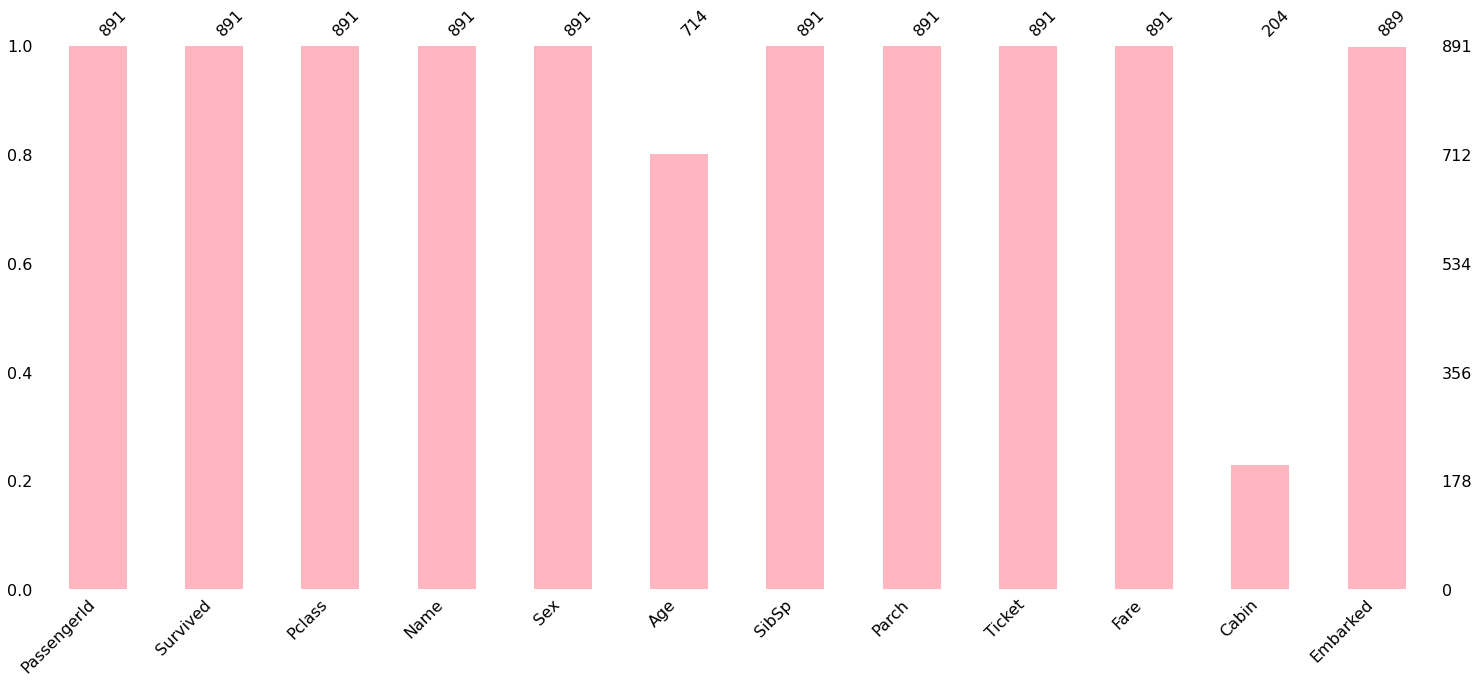

In [14]:
ms.bar(train, color='#ffb6c1')

 Visualizing the locations of the missing data

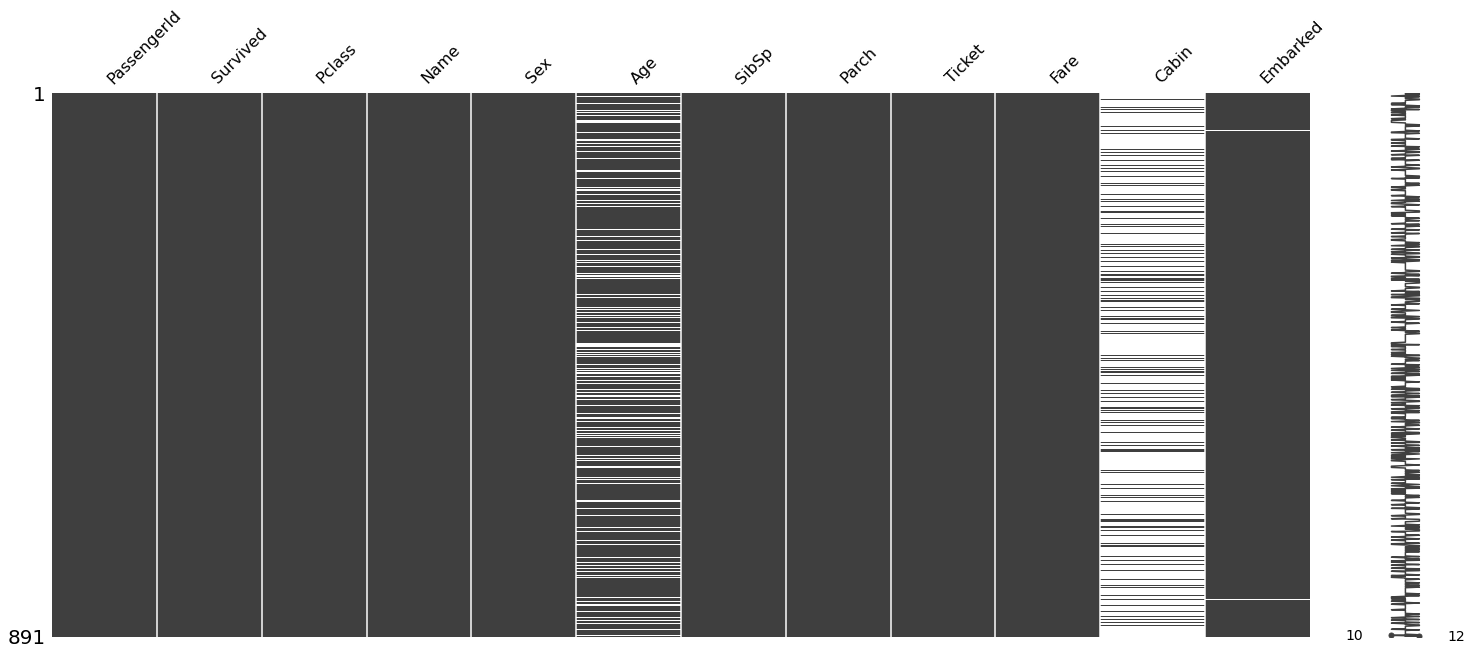

In [19]:
ms.matrix(train)

**1**. The Embarked Column has very few missing values and donot seem to be correlated with any other column, Hence, the missingness in Embarked column can be attributed as Missing Completely at Random.


---


**2**. Both the Age and the Cabin columns have a lot of missing values.This could be a case of MAR as we cannot directly observe the reason for missingness of data in these columns.

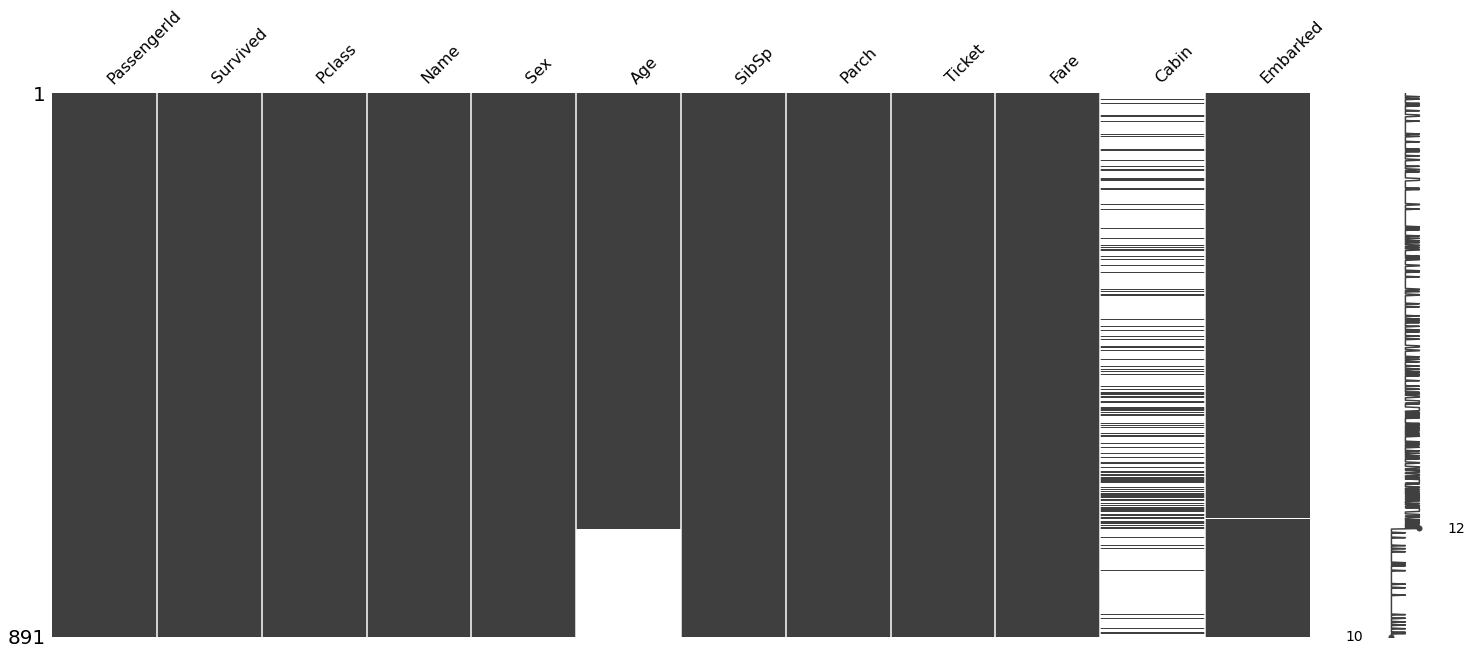

In [20]:
sort = train.sort_values('Age')
ms.matrix(sort)

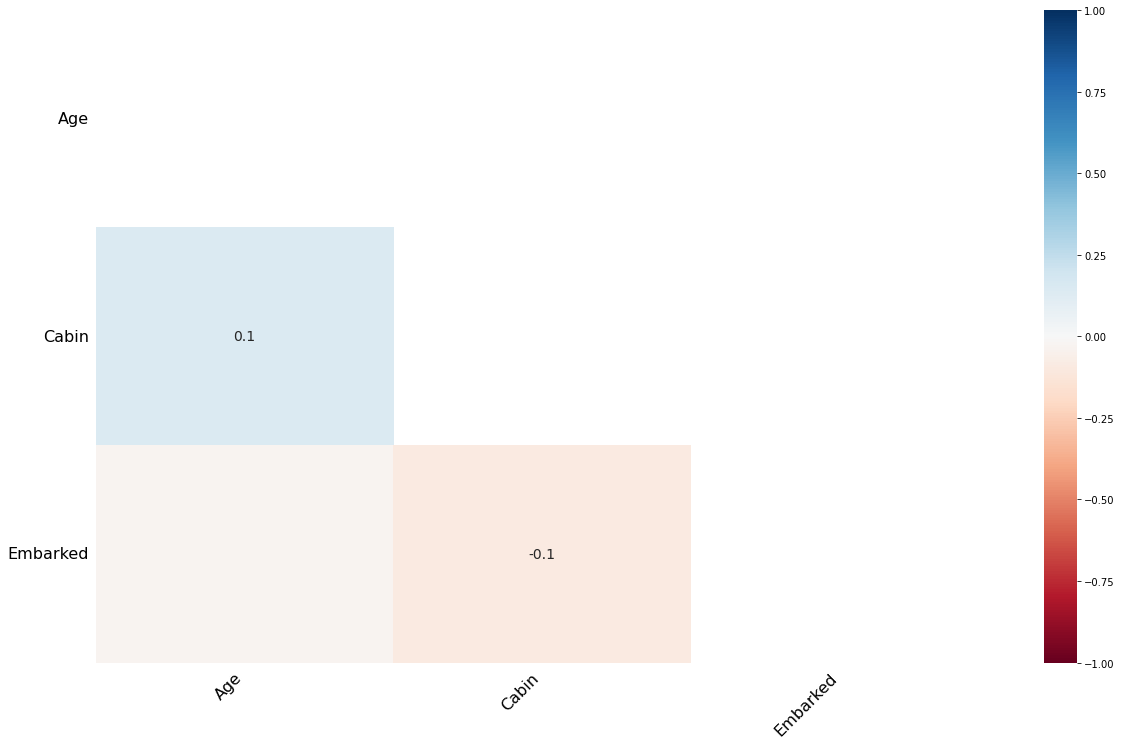

In [21]:
ms.heatmap(train)

## It is clear that here is no relation between the missingness in Age and Cabin column.



---



# Treating Missing Values
 

Pairwise Deletion
Parwise Deletion is used when values are missing completely at random i.e MCAR. 
During Pairwise deletion, only the missing values are deleted.
 All operations like mean,sum etc should skip missing values.

In [22]:
train_1 = train.copy()
train_1['Age'].mean()

29.69911764705882


#Listwise Deletion/ Dropping rows

During Listwise deletion, complete rows(which contain the missing values) are deleted. As a result, it is also called Complete Case deletion. 
Like Pairwise deletion, listwise deletions are also only used for MCAR values.
It is advisable to use it only when the number of missing values is very small.



In [23]:
train_1.dropna(subset=['Age'],how='any',inplace=True)
train_1['Age'].isnull().sum()

0

#Dropping complete columns

Imputations Techniques for non Time Series Problems.
Imputation refers to replacing missing data with substituted values.

In [24]:
from sklearn.impute import SimpleImputer
train_constant = train.copy()
#setting strategy to 'constant' 
mean_imputer = SimpleImputer(strategy='constant') # imputing using constant value
train_constant.iloc[:,:] = mean_imputer.fit_transform(train_constant)
train_constant.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [25]:
from sklearn.impute import SimpleImputer
train_most_frequent = train.copy()
#setting strategy to 'mean' to impute by the mean
mean_imputer = SimpleImputer(strategy='most_frequent')# strategy can also be mean or median 
train_most_frequent.iloc[:,:] = mean_imputer.fit_transform(train_most_frequent)
train_most_frequent.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

#Imputing in Time Series Dataset

In [30]:
city_day = pd.read_csv('city_day.csv',parse_dates=True,index_col='Date')
city_day.head()
city_day1=city_day
city_day2=city_day

In [31]:
mis_val = city_day.isnull().sum()
mis_val_percent = 100 * city_day.isnull().sum() / len(city_day)
mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
print(mis_val_table_ren_columns)

            Missing Values  % of Total Values
City                     0           0.000000
PM2.5                 4598          15.570079
PM10                 11140          37.723071
NO                    3582          12.129626
NO2                   3585          12.139785
NOx                   4185          14.171549
NH3                  10328          34.973418
CO                    2059           6.972334
SO2                   3854          13.050692
O3                    4022          13.619586
Benzene               5623          19.041008
Toluene               8041          27.229014
Xylene               18109          61.322001
AQI                   4681          15.851139
AQI_Bucket            4681          15.851139


There are a lot of missing values and some of the columns like Xylene and PM10 have more than 50% of the values missing

Imputing using ffill

In [32]:
city_day1['Xylene'][50:65]

Date
2015-02-20     7.48
2015-02-21    15.44
2015-02-22     8.47
2015-02-23    28.46
2015-02-24     6.05
2015-02-25     0.81
2015-02-26      NaN
2015-02-27      NaN
2015-02-28      NaN
2015-03-01     1.32
2015-03-02     0.22
2015-03-03     2.25
2015-03-04     1.55
2015-03-05     4.13
2015-03-06      NaN
Name: Xylene, dtype: float64

In [33]:
city_day1.fillna(method='ffill',inplace=True)
city_day1['Xylene'][50:65]

Date
2015-02-20     7.48
2015-02-21    15.44
2015-02-22     8.47
2015-02-23    28.46
2015-02-24     6.05
2015-02-25     0.81
2015-02-26     0.81
2015-02-27     0.81
2015-02-28     0.81
2015-03-01     1.32
2015-03-02     0.22
2015-03-03     2.25
2015-03-04     1.55
2015-03-05     4.13
2015-03-06     4.13
Name: Xylene, dtype: float64

Imputation using bfill

In [34]:
city_day1['AQI'][20:30]

Date
2015-01-21      NaN
2015-01-22      NaN
2015-01-23      NaN
2015-01-24      NaN
2015-01-25      NaN
2015-01-26      NaN
2015-01-27      NaN
2015-01-28      NaN
2015-01-29    209.0
2015-01-30    328.0
Name: AQI, dtype: float64

In [35]:
city_day1.fillna(method='bfill',inplace=True)
city_day1['AQI'][20:30]

Date
2015-01-21    209.0
2015-01-22    209.0
2015-01-23    209.0
2015-01-24    209.0
2015-01-25    209.0
2015-01-26    209.0
2015-01-27    209.0
2015-01-28    209.0
2015-01-29    209.0
2015-01-30    328.0
Name: AQI, dtype: float64

Imputation using Linear Interpolation method

In [36]:
city_day2['Xylene'][50:65]

Date
2015-02-20     7.48
2015-02-21    15.44
2015-02-22     8.47
2015-02-23    28.46
2015-02-24     6.05
2015-02-25     0.81
2015-02-26     0.81
2015-02-27     0.81
2015-02-28     0.81
2015-03-01     1.32
2015-03-02     0.22
2015-03-03     2.25
2015-03-04     1.55
2015-03-05     4.13
2015-03-06     4.13
Name: Xylene, dtype: float64



---




#Advanced Imputation Techniques

Advanced imputation techniques uses machine learning algorithms to impute the missing values in a dataset unlike the previous techniques where we used other column values to predict the missing values. We shall look at the following two techniques in this notebook:

    Nearest neighbors imputation
    Multivariate feature imputation

#K-Nearest Neighbor Imputation

The KNNImputer class provides imputation for filling in missing values using the k-Nearest Neighbors approach.Each missing feature is imputed using values from n_neighbors nearest neighbors that have a value for the feature. 

In [37]:
from sklearn.impute import KNNImputer

In [38]:


train_knn = train.copy(deep=True)

knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")

train_knn['Age'] = knn_imputer.fit_transform(train_knn[['Age']])

In [39]:
train_knn['Age'].isnull().sum()

0


Multivariate feature imputation - Multivariate imputation by chained equations (MICE)


---



A strategy for imputing missing values by modeling each feature with missing values as a function of other features in a round-robin fashion. It performns multiple regressions over random sample ofthe data, then takes the average ofthe multiple regression values and uses that value to impute the missing value.

In [40]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
train_mice = train.copy(deep=True)

mice_imputer = IterativeImputer()
train_mice['Age'] = mice_imputer.fit_transform(train_mice[['Age']])

train_mice['Age'].isnull().sum()

0